In [19]:
! pip install pytorch_pretrained_bert
! pip install torchmetrics
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks/Capstone')
from utils import read_conll_file, read_data, filter_tag
from utils import TAG2IDX, IDX2TAG, DATA_DIR, WSJ_DIR, MODEL_DIR, INT_RESULT_DIR, RESULT_DIR, PLOT_TAGS_DIR
from utils import wsj_train_word_lst, wsj_train_tag_lst, wsj_test_word_lst, wsj_test_tag_lst

from build_model import PosDataset, Net, DEVICE, TOKENIZER
from build_model import pad, train, eval

from analysis import analysis_output

import os
import re
from collections import Counter
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
from torch.utils import data
import torch.optim as optim
from pytorch_pretrained_bert import BertTokenizer, BertModel
from torchmetrics.functional.classification import multiclass_f1_score, multiclass_precision, multiclass_recall, multiclass_accuracy

torch.manual_seed(0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
domain = "newsgroups"
sub_int_res_dir = os.path.join(INT_RESULT_DIR, "Online_fixed_self_learning", domain)

In [26]:
top_percent = 0.1

txt_lst = [name for name in os.listdir(sub_int_res_dir) if "txt" in name and f"top{top_percent}" in name]
txt_lst.sort(key=lambda x: int(re.findall(r'\d+', x)[-1]))
txt_lst

['top0.1-loop1.txt',
 'top0.1-loop2.txt',
 'top0.1-loop3.txt',
 'top0.1-loop4.txt',
 'top0.1-loop5.txt',
 'top0.1-loop6.txt',
 'top0.1-loop7.txt',
 'top0.1-loop8.txt',
 'top0.1-loop9.txt',
 'top0.1-loop10.txt']

In [30]:
txt_name_0 = os.path.join(sub_int_res_dir, txt_lst[0])
txt_name_10 = os.path.join(sub_int_res_dir, txt_lst[-1])

In [31]:
# y_true =  np.array([TAG2IDX[line.split()[1]] for line in open(txt_name, 'r').read().splitlines() if len(line) > 0])
# y_pred =  np.array([TAG2IDX[line.split()[2]] for line in open(txt_name, 'r').read().splitlines() if len(line) > 0])

In [32]:
each_class_df_0 = analysis_output(txt_name_0)
each_class_df_10 = analysis_output(txt_name_10)

In [34]:
def save_sns_fig(each_class_df, output_plot_file):

  fig = plt.figure(figsize=(20,6))

  p1 = sns.scatterplot(
      data=each_class_df, x="POS_tags", y="acc",
      size = 8,
      legend=False)  

  for line in range(0, each_class_df.shape[0]):
      p1.text(
          each_class_df.POS_tags[line], each_class_df.acc[line], 
          round(each_class_df.acc[line], 3), horizontalalignment='left', 
          size='small', color='black', weight='semibold')

  sns.lineplot(data=each_class_df, x="POS_tags", y="acc")
  sns.scatterplot(data=each_class_df, x="POS_tags", y="acc")
  plt.xticks(rotation=45, size=10)

  ax2 = plt.twinx()
  sns.barplot(data=each_class_df, x="POS_tags", y="cnt", alpha=0.5, ax=ax2)
  fig.show()
  # fig.savefig(output_plot_file) 

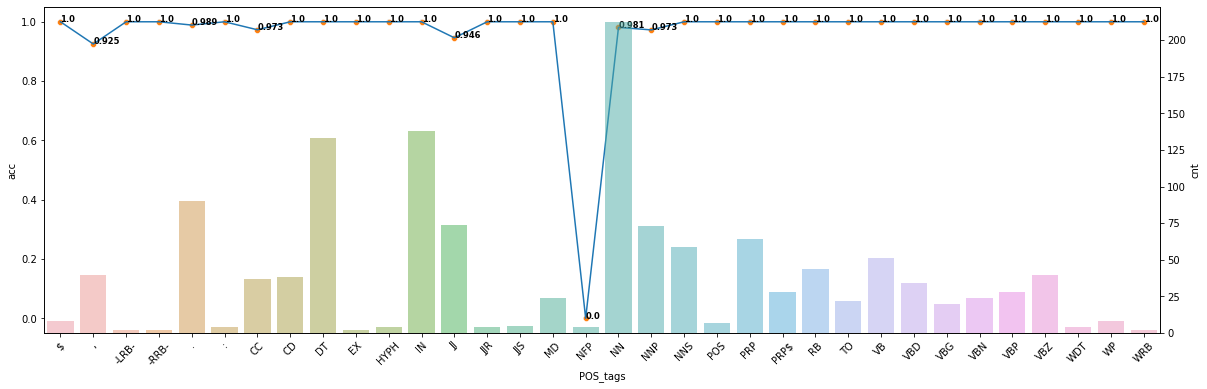

In [35]:
save_sns_fig(each_class_df_0, None)

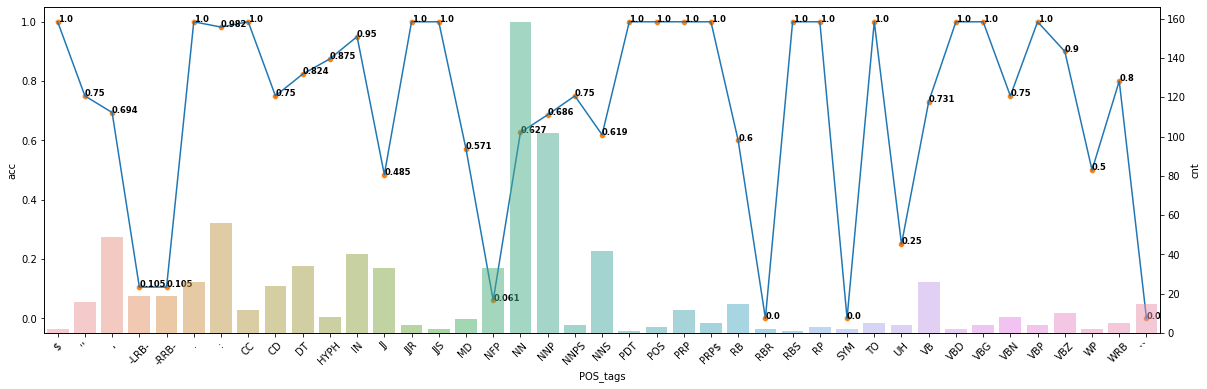

In [36]:
save_sns_fig(each_class_df_10, None)